In [1]:
import torch
from torchvision import datasets, transforms
import helper
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import numpy as np
import matplotlib.pyplot as plt

--2019-05-19 04:59:11--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

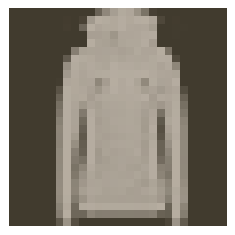

In [3]:
images, labels=next(iter(trainloader))
helper.imshow(images[0,:])

In [0]:
from torch import nn, optim
import torch.nn.functional as F


In [19]:
model=nn.Sequential(nn.Linear(784,256),\
                    nn.ReLU(),
                    nn.Linear(256,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.06)
epoch=5

for e in range(epoch):
  running_loss=0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    logps= model(images)
    loss = criterion(logps, labels)
    
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.713662700008736
Training loss: 0.4299468402701146
Training loss: 0.3786928715672829
Training loss: 0.35001811505094776
Training loss: 0.32911902387290876


torch.Size([1, 784])
torch.Size([1, 10])


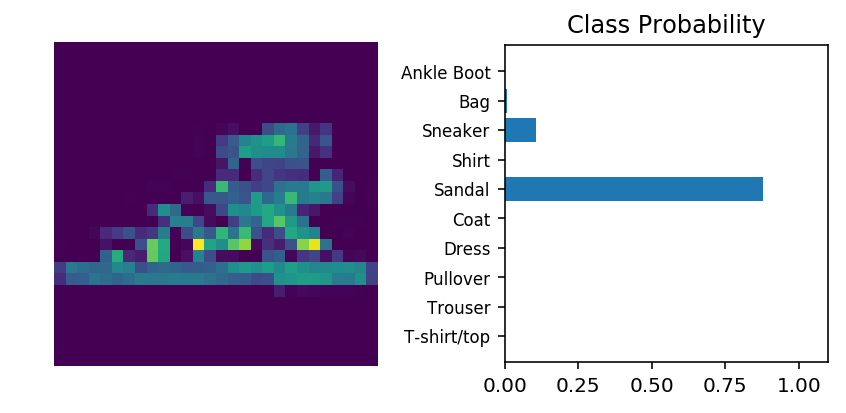

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

images, labels =next(iter(testloader))
img = images[1].view(1,784)
print(img.shape)
logps=model(img)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(logps)
print(ps.shape)

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')